In [56]:
import numpy as np

min_dis = float('inf')  
ix_1, ix_2 = None, None
for i in range(X_reduced.shape[0]):
    for j in range(i + 1, X_reduced.shape[0]):
        # Excluir imágenes en negro (si es necesario)
        if np.sum(X_reduced[i]) > 0 and np.sum(X_reduced[j]) > 0:
            dis_ij = np.sum(np.abs(X_reduced[i] - X_reduced[j]))
            if dis_ij < min_dis:
                min_dis = dis_ij
                ix_1, ix_2 = i, j

print(f"Imágenes similares son {ix_1} y {ix_2} con una distancia de {min_dis}")



Imágenes similares son 12 y 21 con una distancia de 6290.8011877736335


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

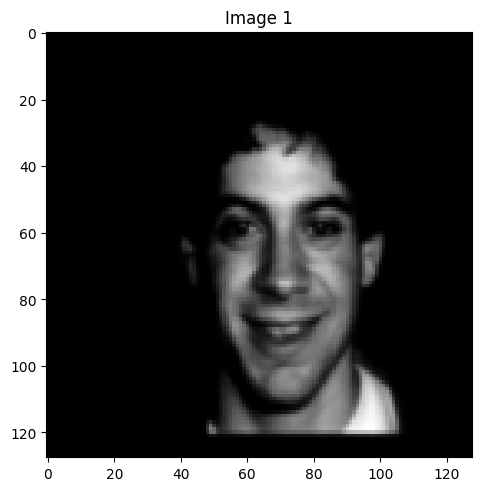

In [57]:
plot_1_images(X[ix_1])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

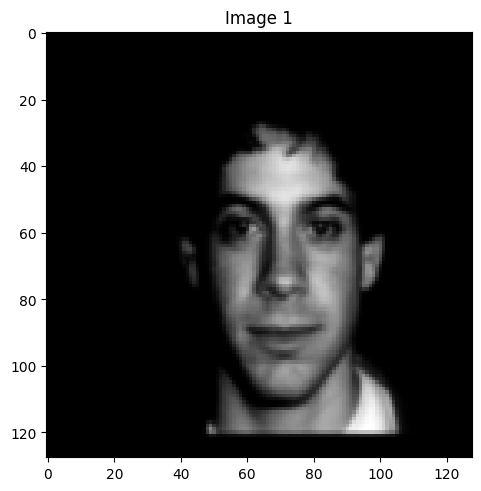

In [58]:
plot_1_images(X[ix_2])

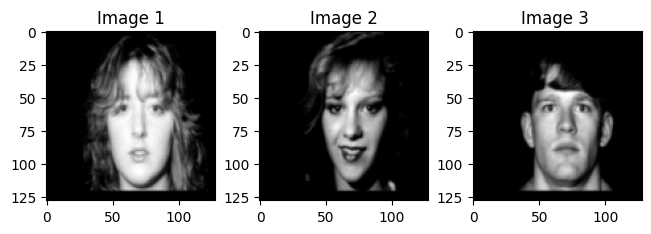

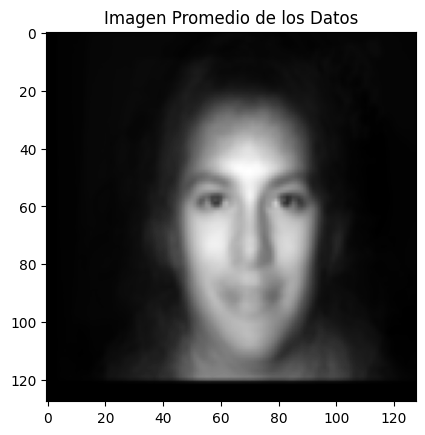

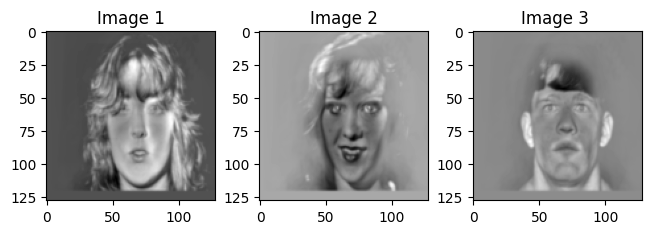

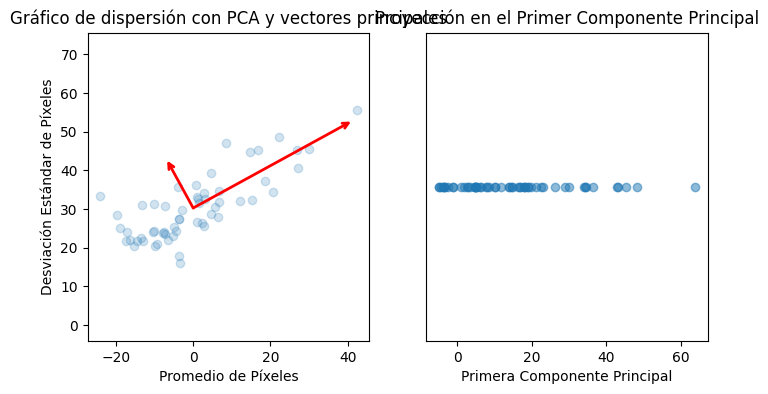

Eigenvalores:
[5.28776320e+06 2.05715267e+06 1.48987869e+06 1.34623244e+06
 1.07082317e+06 9.07375642e+05 8.44544716e+05 6.53596579e+05
 5.26480815e+05 4.19782451e+05 3.50762317e+05 3.34552396e+05
 3.04862822e+05 2.73010224e+05 2.64996590e+05 2.37355226e+05
 2.21308238e+05 2.05297941e+05 1.94033646e+05 1.78291372e+05
 1.68743688e+05 1.53360423e+05 1.37986722e+05 1.31695918e+05
 1.22141259e+05 1.17281312e+05 1.05748163e+05 1.02180529e+05
 9.72333407e+04 9.30983497e+04 8.94324211e+04 8.48855534e+04
 8.04303489e+04 7.28058464e+04 6.85417573e+04 6.56041791e+04
 6.38779247e+04 5.98072885e+04 5.25701409e+04 5.08992631e+04
 4.87382035e+04 4.63315877e+04 4.40161419e+04 3.67956432e+04
 3.38624506e+04 3.36376365e+04 3.19146665e+04 2.96319921e+04
 2.86371473e+04 2.64614173e+04 2.56667239e+04 2.34306088e+04
 2.01758597e+04 1.89333969e+04 1.37132827e+04 7.99771711e+03
 1.59120606e-24]

Matriz de Covarianza:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.    

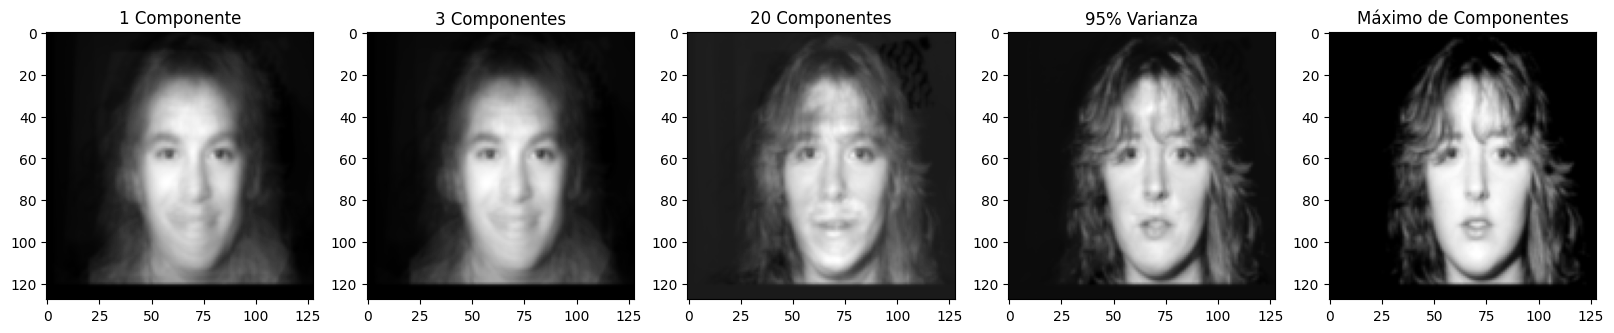

Imágenes similares son 12 y 21 con una distancia de 6290.8011877736335


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from PIL import Image
import random
import pandas as pd

def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data), cmap='gray')
    ax.set_title(label=label)
    return fig, ax
def plot_3_images(data, ix_1, ix_2, ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]), cmap='gray')
    ax[0].set_title(label="Image %s" % ix_1)
    ax[1].imshow(fn_shape(data[ix_2]), cmap='gray')
    ax[1].set_title(label="Image %s" % ix_2)
    ax[2].imshow(fn_shape(data[ix_3]), cmap='gray')
    ax[2].set_title(label="Image %s " % ix_3)
    plt.show()




d_name = 'dataTest'
sample = 0.2
ancho = 128
alto = 128




X = []
for nfile in os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name, nfile), "rb").read()
        img = Image.frombytes('L', (ancho, alto), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)


plot_3_images(X, 1, 2, 3)
X_mean = X.mean(axis=0)
X_center = X - X_mean


fig, ax = plt.subplots()
plot_1_images(X_mean, label="Imagen Promedio de los Datos", ax=ax)
plt.show()
plot_3_images(X_center, 1, 2, 3)


promedios = np.mean(X_center, axis=1)
desviaciones = np.std(X_center, axis=1)


X_pca = np.column_stack((promedios, desviaciones))

#PCA 
pca = PCA(n_components=2)
pca.fit(X_pca)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)  
    draw_vector(pca.mean_, pca.mean_ + v)
plt.xlabel('Promedio de Píxeles')
plt.ylabel('Desviación Estándar de Píxeles')
plt.title('Gráfico de dispersión con PCA y vectores principales')
plt.axis('equal')

X_star = np.dot(X_pca, pca.components_[0, :].reshape(2, 1))
Y = np.zeros_like(X_star)

plt.subplot(1, 2, 2)
plt.scatter(X_star, Y, alpha=0.5)
plt.xlabel('Primera Componente Principal')
plt.title('Proyección en el Primer Componente Principal')
plt.gca().get_yaxis().set_ticks([])  # Quitar los ticks del eje Y ya que Y=0
plt.show()


cov_matrix = np.cov(X_center.T)
n_samples, n_features = X_center.shape

# PCA con el número máximo de componentes posibles
n_components = min(n_samples, n_features)
pca_max = PCA(n_components=n_components)
X_reduced = pca_max.fit_transform(X_center)

eigen_values = pca_max.explained_variance_
eigen_faces = pca_max.components_

print("Eigenvalores:")
print(eigen_values)
print("\nMatriz de Covarianza:")
print(cov_matrix)

#Numero de componentes necesarios para el 95% de la varianza
pca_full = PCA()
pca_full.fit(X_center)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(explained_variance >= 0.95) + 1

#Tabla con el número de componentes y la varianza explicada acumulada
components_table = pd.DataFrame({
    'Número de Componentes': np.arange(1, len(explained_variance) + 1),
    'Varianza Explicada Acumulada': explained_variance
})

print("\nNúmero de Componentes necesarios para el 95% de varianza explicada:", num_components_95)
print("\nTabla de Varianza Explicada Acumulada:")
print(components_table)

#Reconstrucción con diferentes números de componentes
def reconstruct_image(pca, num_components, X_center, X_mean, idx):
    X_reduced = pca.transform(X_center)
    components = pca.components_[:num_components]
    image_reconstructed = X_mean + np.dot(X_reduced[idx, :num_components], components)
    return image_reconstructed

idx = 1  
n_components_list = [1, 3, 20, num_components_95, n_components]
titles = ["1 Componente", "3 Componentes", "20 Componentes", "95% Varianza", "Máximo de Componentes"]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for ax, n_components, title in zip(axes, n_components_list, titles):
    pca_reconstruct = PCA(n_components=n_components)
    pca_reconstruct.fit(X_center)
    face_reconstructed = reconstruct_image(pca_reconstruct, n_components, X_center, X_mean, idx)
    plot_1_images(face_reconstructed, label=title, ax=ax)
plt.show()

min_dis = float('inf')  
ix_1, ix_2 = None, None
for i in range(X_reduced.shape[0]):
    for j in range(i + 1, X_reduced.shape[0]):
        # Excluir imágenes en negro (si es necesario)
        if np.sum(X_reduced[i]) > 0 and np.sum(X_reduced[j]) > 0:
            dis_ij = np.sum(np.abs(X_reduced[i] - X_reduced[j]))
            if dis_ij < min_dis:
                min_dis = dis_ij
                ix_1, ix_2 = i, j
                


print(f"Imágenes similares son {ix_1} y {ix_2} con una distancia de {min_dis}")


n_components = min(n_samples, n_features)  

#PCA a los datos
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_center)

# Extraer el primer componente PCA
first_component = X_reduced[:, 0]

# Crear una lista de IDs ficticios para las imágenes
# Supongamos que tienes tantas imágenes como IDs
ids = np.arange(1, X_center.shape[0] + 1)

# Crear un DataFrame con los IDs y el primer componente PCA
results_df = pd.DataFrame({
    'id': ids,
    'label': first_component
})

# Guardar el DataFrame como un archivo CSV
results_df.to_csv('Estebna-A.csv', index=False)



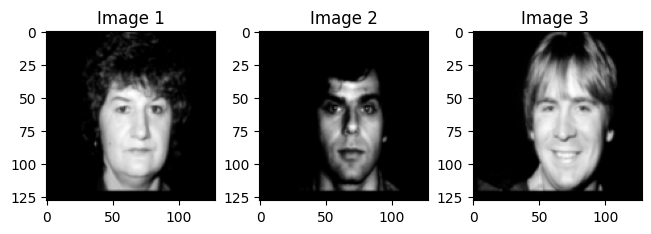

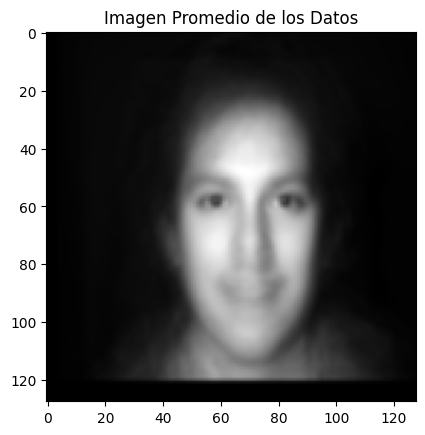

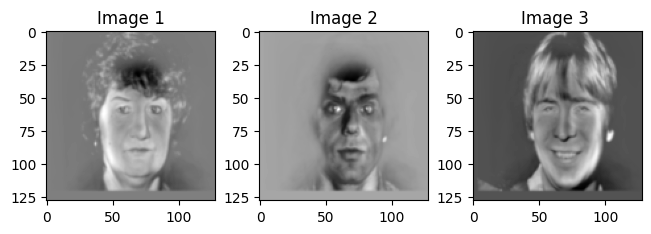

Eigenvalores:
[5.65112807e+06 2.15294375e+06 1.93250717e+06 1.40901927e+06
 1.16476214e+06 8.12809274e+05 6.94723120e+05 6.38269207e+05
 4.49137586e+05 4.15493101e+05 3.59808942e+05 3.01737656e+05
 2.54974771e+05 2.35147050e+05 2.23725388e+05 2.11384912e+05
 2.02799569e+05 1.79943756e+05 1.77995367e+05 1.55540311e+05
 1.53215894e+05 1.41430469e+05 1.35596872e+05 1.26548214e+05
 1.22420927e+05 1.13860699e+05 1.05818483e+05 1.00921001e+05
 9.80050181e+04 9.28895558e+04 8.99024894e+04 8.32358359e+04
 7.38358811e+04 6.94273664e+04 6.19220108e+04 6.09522157e+04
 5.92423433e+04 5.73065981e+04 5.38222128e+04 4.94908048e+04
 4.65292593e+04 4.36271559e+04 4.20116831e+04 4.04803348e+04
 3.77302727e+04 3.54577404e+04 3.43662696e+04 3.09848548e+04
 3.03843884e+04 2.72301457e+04 2.41947206e+04 2.17765622e+04
 1.84862567e+04 1.50759324e+04 8.17750437e+03 2.71847173e-24]

Matriz de Covarianza:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0

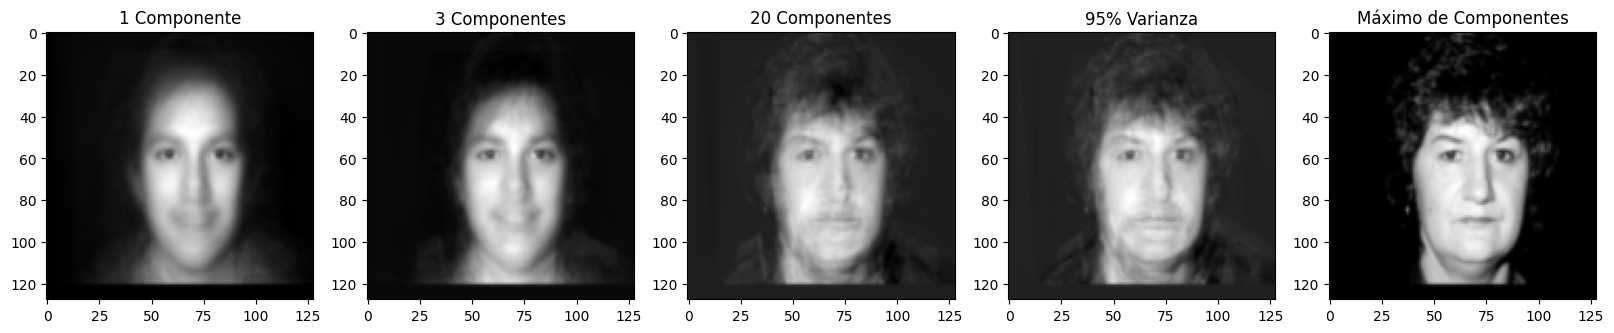

Archivo CSV guardado con los datos del conjunto de testing.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from PIL import Image
import random
import pandas as pd


def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data), cmap='gray')
    ax.set_title(label=label)
    return fig, ax

def plot_3_images(data, ix_1, ix_2, ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]), cmap='gray')
    ax[0].set_title(label="Image %s" % ix_1)
    ax[1].imshow(fn_shape(data[ix_2]), cmap='gray')
    ax[1].set_title(label="Image %s" % ix_2)
    ax[2].imshow(fn_shape(data[ix_3]), cmap='gray')
    ax[2].set_title(label="Image %s " % ix_3)
    plt.show()

d_name = 'dataTest'
sample = 0.2
ancho = 128
alto = 128

X = []
for nfile in os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name, nfile), "rb").read()
        img = Image.frombytes('L', (ancho, alto), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)


plot_3_images(X, 1, 2, 3)


X_mean = X.mean(axis=0)
X_center = X - X_mean

fig, ax = plt.subplots()
plot_1_images(X_mean, label="Imagen Promedio de los Datos", ax=ax)
plt.show()

plot_3_images(X_center, 1, 2, 3)

# PCA con el número máximo de componentes posibles
n_samples, n_features = X_center.shape
n_components = min(n_samples, n_features)
pca_max = PCA(n_components=n_components)
X_reduced = pca_max.fit_transform(X_center)

# Eigenvalores y Matriz de Covarianza
eigen_values = pca_max.explained_variance_
cov_matrix = np.cov(X_center.T)
print("Eigenvalores:")
print(eigen_values)
print("\nMatriz de Covarianza:")
print(cov_matrix)

# Número de componentes para el 95% de varianza explicada
pca_full = PCA()
pca_full.fit(X_center)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(explained_variance >= 0.95) + 1

def reconstruct_image(pca, num_components, X_center, X_mean, idx):
    X_reduced = pca.transform(X_center)
    components = pca.components_[:num_components]
    image_reconstructed = X_mean + np.dot(X_reduced[idx, :num_components], components)
    return image_reconstructed

idx = 1  
n_components_list = [1, 3, 20, num_components_95, n_components]
titles = ["1 Componente", "3 Componentes", "20 Componentes", "95% Varianza", "Máximo de Componentes"]

fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for ax, n_components, title in zip(axes, n_components_list, titles):
    pca_reconstruct = PCA(n_components=n_components)
    pca_reconstruct.fit(X_center)
    face_reconstructed = reconstruct_image(pca_reconstruct, n_components, X_center, X_mean, idx)
    plot_1_images(face_reconstructed, label=title, ax=ax)
plt.show()

n_components_test = 1 
pca = PCA(n_components=n_components_test)
pca.fit(X_center) 


X_test = X_center[:n_samples // 2, :]  
X_test_pca = pca.transform(X_test)  

n_samples_test = X_test.shape[0]
binary_ids = [bin(i)[2:].zfill(16) for i in range(n_samples_test)]


df_test_pca = pd.DataFrame({
    'id': binary_ids,
    'label': X_test_pca[:, 0]  # Solo la primera componente
})

# Guardar archivo para Kaggle
df_test_pca.to_csv('Esteban_Agudelo.csv', index=False)
print("Archivo CSV guardado con los datos del conjunto de testing.")
